# **ANÁLISE DO COVID-19 NA CIDADE DO RECIFE PELA VISÃO DE UM CHINÊS**


---

Autor: Felipe Jun Ting Lin

Universidade Federal de Pernambuco






# **Introdução**

Este trabalho foi feito com o intuito de analisar e possivelmente prever o 
comportamento do COVID-19 na cidade do Recife. Expandindo o modelo padrão do SIR, será analisado os possíveis cenário do vírus quando o indivíduo for exposto mas não se torna infeccioso, o número estimados de pessoas assintomáticas e também, será adicionado o número de óbitos ocasionado por vírus.


# **Modelo SIR**

Como dito previamente, o modelo SIR é o modelo base que é amplamente utilizado para prever casos de pandemia criado por Kermack e McKendrick em 1927. Esse modelo é composto por 3 variáveis dependentes do tempo (t), onde cada um representa respectivamente: S(t): Pessoas suscetíveis a contraírem o vírus, I(t): Pessoas infectadas pelo vírus e R(t): Pessoas que se recuperaram da doença. E as variáveis beta (β) e gamma (γ) são representados como a taxa de contágio e a taxa de recuperação. No qual, a população total é composto de N = S + I + R.


\begin{align}
\frac{{\rm d}S}{{\rm d}t} & = -\frac{\beta S I} N\\
\frac{{\rm d}I}{{\rm d}t} & = \frac{\beta S I} N - \gamma I\\
\frac{{\rm d}R}{{\rm d}t} & = \gamma I\\
\end{align}

# **Modelo SEIARO**

Expandindo o modelo anterior e aumentando a sua complexidade, a fim de obter resultados mais precisos, inclui-se mais 3 parâmetros que indicam E(t): Pessoas que foram expostas ao vírus mas que ainda não são agentes infecciosos, A(t): Pessoas assintomáticos à doença e D(t): Pessoas que vieram ao óbito. As novas variáveis incluidas são, lambda (λ), omega (ω) e kappa (κ) que correspondem a tempo de latência, a taxa de assintomáticos e a taxa da mortalidade. No qual, a população total é composto de N = S + E + I + A + R + O.

\begin{align}
\frac{{\rm d}S}{{\rm d}t} & = -\frac{\beta SI} N\\
\frac{{\rm d}E}{{\rm d}t} & = \frac{\beta SI} N - \frac{E}\lambda  - {\omega E}\\
\frac{{\rm d}I}{{\rm d}t} & = \frac{E}\lambda - \gamma I - \kappa I\\
\frac{{\rm d}A}{{\rm d}t} & = \omega E\\
\frac{{\rm d}R}{{\rm d}t} & = \gamma I\\
\frac{{\rm d}O}{{\rm d}t} & = \kappa I\\
\end{align}

# **Estatísticas**



```
População total no Recife (N) = 1653461
Número de casos confirmados total = 37152
Número ativo de infectados (I) = 841
Número estimado de assintomáticos (A) = 169
Número de recuperados (R)= 33831 
Número de óbitos = 2480 
Taxa de contágio (β) = 0.89
Taxa de recuperação (γ)=  1/6.3
Tempo de latência (λ) = 5
Taxa da mortalidade (κ) = 0,0667

Número atualizado da covid até 11/11/2020 
```



Estes dados foram retirados do site do Instituto Brasileiro de Geografia e Estatística (IBGE), Instituto para Redução de Riscos e Desastres de Pernambuco (IRRD-PE), PubMed e Orgão MarcoZero. Os números estão atualizados até o dia 11 de novembro de 2020. 

# **Código**

Seguirei abaixo o código feito para mostrar gráficos da evolução de coronavírus

Incluindo as bibliotecas

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Incluindo os dados

In [ ]:
# N = A população total.
N = 1653461

# Numeros inicias de infectados, assintomáticos, recuperados e obitos; I0, E0, A0, R0, O0.
I0, E0, A0, R0, O0 = 	1, 0, 0, 0, 0

# O resto da populacao S0 eh suscetivel a doenca.
S0 = N - I0 - E0 - A0 - R0 - O0

# beta(taxa de contágio), gamma (taxa de recuperação (1/dias)), omega (taxa de assintomáticos) lambda (tempo de latência) e kappa (taxa da mortalidade)
beta, gamma, kappa = 0.89, 1/6.3, 0.0667
lambda0: float
omega: float



Equações diferenciais e plotando o gráfico

In [ ]:
# Funcao que resolve as quatro derivadas do modelo criado para esse trabalho
def deriv(y, t, N, beta, gamma, lambda0, omega, kappa):
    S, E, I, A, R, O = y
    dSdt = -(beta * S * I / N) 
    dEdt = ((beta * S * I / N) - (E/lambda0) - (omega * E))
    dIdt = ((E/lambda0) - (gamma * I) - (kappa * I))
    dAdt = omega * E
    dRdt = gamma * I
    dOdt = kappa * I
    return dSdt, dEdt, dIdt, dAdt, dRdt, dOdt

# Plotando o gráfico
def graph():
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

    ax.plot(t, S/N, 'blue' , alpha=0.7, lw=3.5, label='Suscetíveis')
    # ax.plot(t, E/N, 'orange' , alpha = 0.7, lw=3.5, label='Expostos')
    ax.plot(t, I/N, 'red' , alpha=0.7, lw=3.5, label='Infectados')
    ax.plot(t, A/N, 'purple' , alpha=0.7, lw=3.5, label='Assintomáticos' )
    ax.plot(t, R/N, 'green', alpha=0.7, lw=3.5, label='Recuperados com Imunidade')
    ax.plot(t, O/N, 'black', alpha=0.7, lw=3.5, label='Óbitos')

    ax.set_xlabel('Tempo (dias)')
    ax.set_ylabel('Individuos (%)')

    ax.set_ylim(0,1)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')

    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)

    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)


# Resolvendo o ODE no cenário onde os assintomáticos são 20% dos infectados quando o período de latência é de 5 dias

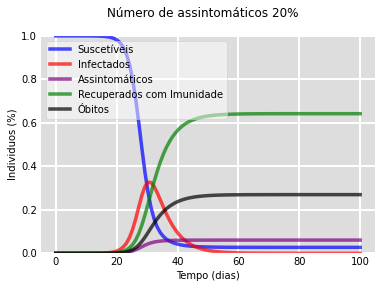

In [ ]:
# Condições iniciais para o modelo básico
y0 = S0, E0, I0, A0, R0, O0  
lambda0 = 1/5  #período de latência é de 5 dias
omega = 0.2 #20% dos infectados são assintomáticos

# Gráfico com previsão de próximos 100 dias
t = np.linspace(0, 100, 100)

ret = odeint(deriv, y0, t, args=(N, beta, gamma, lambda0, omega, kappa))
S, E, I, A, R, O = ret.T

graph()
plt.suptitle("Número de assintomáticos (20%) - 5 dias")
plt.savefig('tristevirus.pdf')
plt.show()

# Resolvendo o ODE no cenário onde os assintomáticos são 20% dos infectados e o período de latência é de 8 dias

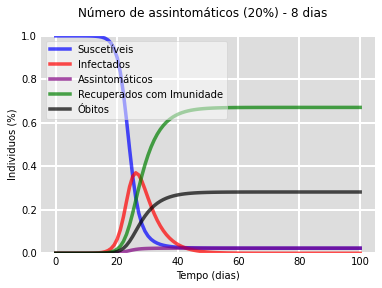

In [ ]:
# Condições iniciais para o modelo básico
y0 = S0, E0, I0, A0, R0, O0  
lambda0 = 1/8 #período de latência de 8 dias
omega = 0.2 #20% dos infectados são assintomáticos


# Gráfico com previsão de próximos 100 dias
t = np.linspace(0, 100, 100)
ret = odeint(deriv, y0, t, args=(N, beta, gamma, lambda0, omega, kappa))
S, E, I, A, R, O = ret.T

graph()
plt.suptitle("Número de assintomáticos (20%) - 8 dias")
plt.savefig('tristevirus2.pdf')
plt.show()

# Resolvendo o ODE no cenário onde os assintomáticos são 40% dos infectados e o período de latência é de 5 dias

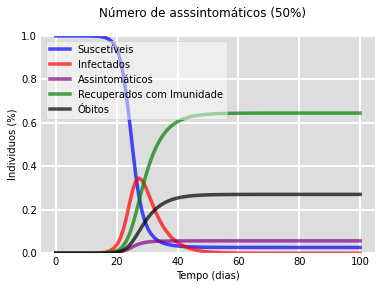

In [ ]:
# Condições iniciais para o modelo básico
y0 = S0, E0, I0, A0, R0, O0  
lambda0 = 1/5 #periodo de latência de 5 dias
omega = 0.4 #40% dos infectados são assintomáticos


# Gráfico com previsão de próximos 100 dias
t = np.linspace(0, 100, 100)
ret = odeint(deriv, y0, t, args=(N, beta, gamma, lambda0, omega, kappa))
S, E, I, A, R, O = ret.T

graph()
plt.suptitle("Número de asssintomáticos (40%) - 5 dias")
plt.savefig('tristevirus3.pdf')
plt.show()

# Resolvendo o ODE no cenário onde os assintomáticos são 40% dos infectados e o período de latência é de 8 dias

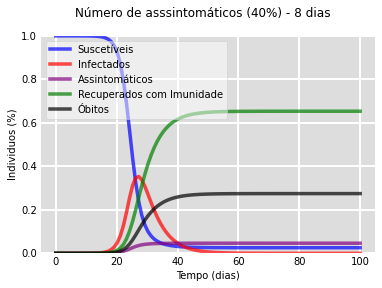

In [ ]:
# Condições iniciais para o modelo básico
y0 = S0, E0, I0, A0, R0, O0  
lambda0 = 1/8 #periodo de latência de 8 dias
omega = 0.4 #40% dos infectados são assintomáticos


# Gráfico com previsão de próximos 100 dias
t = np.linspace(0, 100, 100)
ret = odeint(deriv, y0, t, args=(N, beta, gamma, lambda0, omega, kappa))
S, E, I, A, R, O = ret.T

graph()
plt.suptitle("Número de asssintomáticos (40%) - 8 dias")
plt.savefig('tristevirus4.pdf')
plt.show()

# Resolvendo o ODE no cenário onde os assintomáticos são 20% dos infectados e o período de latência é de 1 dia

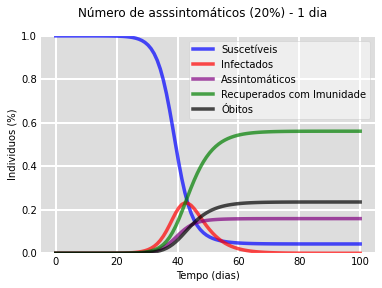

In [ ]:
# Condições iniciais para o modelo básico
y0 = S0, E0, I0, A0, R0, O0  
lambda0 = 1 #periodo de latência de 1 dia
omega = 0.2 #20% dos infectados são assintomáticos


# Gráfico com previsão de próximos 100 dias
t = np.linspace(0, 100, 100)
ret = odeint(deriv, y0, t, args=(N, beta, gamma, lambda0, omega, kappa))
S, E, I, A, R, O = ret.T

graph()
plt.suptitle("Número de asssintomáticos (20%) - 1 dia")
plt.savefig('tristevirus5.pdf')
plt.show()

# **Conclusão**

Por fim, este foi um estudo que mostra um pouco os cenários diferentes, alterando um pouco as taxas de assintomático e o período de latência que um indivíduo passa para começar a desenvolver os sintomas do COVID-19. É importante notar que os gráficos possam não ser fidedignas ao de um mundo real pela falta de outros parâmetros, tais como: mutação de vírus, lockdown, uso das máscaras, a aplicação da vacina que não foram incluídos nesse projeto, mas é essencial para se ter um embasamento prévio de como seria a previsão caso os cenários sejam concretizados. 

# **Referências**

[Análise do Modelo SEIR sobre o vírus da COVID-19 no Brasil](https://www.researchgate.net/publication/341639851_Epidemic_analysis_of_COVID-19_in_Brazil_by_a_generalized_SEIR_model)

[IBGE - PE](https://www.ibge.gov.br/cidades-e-estados/pe.html)

[Instituto Para Redução de Riscos e Desastres de PE](https://www.irrd.org/covid-19/)

[Evolução da epidemia do COVID-19 em Pernambuco](https://marcozero.org/quando-acabara-a-epidemia-do-coronavirus-em-pernambuco/#:~:text=Mas%20a%20latência%20dos%20testes,testes%20do%20tipo%20RT-PCR.)

[Secretaria de Saúde de PE](https://www.pecontracoronavirus.pe.gov.br/4831-2/)

[Dados de isolamento social disponibilizado pelo inloco](https://www.inloco.com.br/covid-19)

